In [1]:
import numpy as np
import pandas as pd
import pylab as plt
import datetime
import seaborn as sns


In [2]:
import matplotlib.style as style 
import seaborn as sns
# #style.available
# pal = sns.color_palette("Set1")
# style.use('seaborn-poster') 
# #sns.set_style('darkgrid')
# sns.set_style("whitegrid")

## UKESM1

In [3]:
# including a notional soil NOx emission



In [4]:
start_years = np.arange(start=1870,stop=2010,step=20)
end_years = np.arange(start=1890,stop=2030,step=20)

In [5]:
burdn_data=pd.DataFrame()
for start_year, end_year in zip(start_years, end_years):
    filename = 'data/u_bc179_o3_budget_'+str(start_year)+'_'+str(end_year)+'.csv'
    tmp_data = pd.read_csv(filename, delimiter=',', header=0)
    
    st_time = datetime.datetime(start_year, 1, 15)
    en_time = datetime.datetime(end_year, 1, 15)
    # declare an index for the returned dataframe
    myrange = pd.date_range(st_time, en_time, freq='Y')
    tmp_data.index = myrange
    burdn_data=pd.concat([burdn_data, tmp_data])

In [6]:

budgt_data=pd.DataFrame()
filename = 'data/u_bc179_o3_budget_terms_1850_1870.csv'
tmp_data = pd.read_csv(filename, delimiter=',', header=0)
st_time = datetime.datetime(1850, 1, 15)
en_time = datetime.datetime(1870, 1, 15)
# declare an index for the returned dataframe
myrange = pd.date_range(st_time, en_time, freq='Y')
tmp_data.index = myrange
budgt_data=pd.concat([budgt_data, tmp_data*1e3])

start_years = np.arange(start=1870,stop=2010,step=20)
end_years = np.arange(start=1890,stop=2030,step=20)
#budgt_data=pd.DataFrame()
for start_year, end_year in zip(start_years, end_years):
    filename = 'data/u_bc179_o3_budget_terms_'+str(start_year)+'_'+str(end_year)+'.csv'
    tmp_data = pd.read_csv(filename, delimiter=',', header=0)
    st_time = datetime.datetime(start_year, 1, 15)
    en_time = datetime.datetime(end_year, 1, 15)
    # declare an index for the returned dataframe
    myrange = pd.date_range(st_time, en_time, freq='M')
    tmp_data.index = myrange
    budgt_data=pd.concat([budgt_data, tmp_data])
    
filename = 'data/u_bc179_o3_budget_terms_2010_2014.csv'
tmp_data = pd.read_csv(filename, delimiter=',', header=0)
st_time = datetime.datetime(2010, 1, 15)
en_time = datetime.datetime(2014, 1, 15)
# declare an index for the returned dataframe
myrange = pd.date_range(st_time, en_time, freq='Y')
tmp_data.index = myrange
budgt_data=pd.concat([budgt_data, tmp_data*1e3])


In [7]:
ann_mean_budgt_data=budgt_data.groupby(budgt_data.index.year).sum()
ann_mean_budgt_data['TOT_P'] = ann_mean_budgt_data['HO2_NO'] + ann_mean_budgt_data['MeO2_NO']  +\
ann_mean_budgt_data['RO2_NO'] + ann_mean_budgt_data['OH_RCOOH'] + ann_mean_budgt_data['OH_RONO2'] +\
ann_mean_budgt_data['OH_PAN'] + ann_mean_budgt_data['NIT_PHOT']

ann_mean_budgt_data['TOT_L']  = ann_mean_budgt_data['O1D_H2O'] + ann_mean_budgt_data['HO2_O3'] + \
ann_mean_budgt_data['OH_O3'] + ann_mean_budgt_data['O3_ALK'] +\
2*ann_mean_budgt_data['N2O5_H2O'] + ann_mean_budgt_data['NO3_LOSS']

In [8]:
ssp370_budgt_data=pd.DataFrame()
start_year=2015
end_year=2100
filename = 'data/u_bc179_o3_budget_terms_ssp370.csv'
tmp_data = pd.read_csv(filename, delimiter=',', header=0)
st_time = datetime.datetime(start_year, 1, 15)
en_time = datetime.datetime(end_year, 1, 15)
myrange = pd.date_range(st_time, en_time, freq='Y')
tmp_data.index = myrange
ssp370_data=pd.concat([ssp370_budgt_data, tmp_data])
ssp370_data = pd.DataFrame.multiply(ssp370_data,1e3)
ssp370_data=ssp370_data.groupby(ssp370_data.index.year).sum()
# ann_mean_budgt_data = ann_mean_budgt_data.groupby(ann_mean_budgt_data.index.year).mean()
ann_mean_budgt_data = pd.concat([ann_mean_budgt_data,ssp370_data])

In [9]:
ukesm1_emilnox = pd.read_csv('data/LNOx.CMIP6_UKESM1.csv')
ukesm1_emilnox.index = pd.to_datetime(ukesm1_emilnox['year'], format='%Y')
ukesm1_emilnox = ukesm1_emilnox.groupby(ukesm1_emilnox.index.year).mean()

In [10]:
# import pylab as plt
# #plt.figure(figsize=(6,6), dpi=200)
# co_ems = plt.loadtxt('data/co_ems.dat')
# nox_ems = plt.loadtxt('data/nox_ems_ems.dat')
# hcho_ems = plt.loadtxt('data/hcho_ems_ems.dat')
# moles_hcho_ems = hcho_ems/0.034
# me2co_ems = plt.loadtxt('data/me2co_ems_ems.dat')
# moles_me2co = me2co_ems/ 0.058
# mecho_ems = plt.loadtxt('data/mecho_ems_ems.dat')
# moles_mecho = mecho_ems/ 0.044
# total_moles = moles_hcho_ems+moles_me2co+moles_mecho
# total_C_in_kg = total_moles * 0.012

In [11]:
ann_mean_budgt_data.index = pd.to_datetime(ann_mean_budgt_data.index, format='%Y')
ann_mean_budgt_data = ann_mean_budgt_data.groupby(ann_mean_budgt_data.index.year).mean() 

## ALL DATA

In [12]:
cmip6_ems = pd.read_csv('data/cmip6_emissions.csv', header=2)
cmip6_ems.index = pd.to_datetime(cmip6_ems['Variable'], format='%Y')
cmip6_ems = cmip6_ems.groupby(cmip6_ems.index.year).mean()

## CESM2-WACCM

In [13]:
# not including lnox

In [14]:
cesm2_waccm_bud_ssp = pd.read_csv('data/cesm2_waccm_ssp370.csv')
cesm2_waccm_bud_ssp.columns=['Year','O3_Prod','O3_Loss']
cesm2_waccm_bud_ssp.index=pd.to_datetime(cesm2_waccm_bud_ssp['Year'], format='%Y')
cesm2_waccm_bud_ssp = cesm2_waccm_bud_ssp.groupby(cesm2_waccm_bud_ssp.index.year).mean()

In [15]:
cesm2_waccm_bud = pd.read_csv('data/cesm2_waccm.csv')
cesm2_waccm_bud.columns=['Year','O3_Prod','O3_Loss']
cesm2_waccm_bud.index=pd.to_datetime(cesm2_waccm_bud['Year'], format='%Y')
cesm2_waccm_bud = cesm2_waccm_bud.groupby(cesm2_waccm_bud.index.year).mean()
cesm2_waccm_bud =  pd.concat([cesm2_waccm_bud,cesm2_waccm_bud_ssp])

In [16]:
cesm2_waccm_emilnox = pd.read_csv('data/LNOx.CMIP6_CESM2-WACCM.csv')
cesm2_waccm_emilnox.index = pd.to_datetime(cesm2_waccm_emilnox['year'], format='%Y')
cesm2_waccm_emilnox = cesm2_waccm_emilnox.groupby(cesm2_waccm_emilnox.index.year).mean()

## GFDL-ESM4

In [17]:
### gfdl includes anthro, biomass burning, lightning, soil, and aircraft

In [18]:
gfdl_esm4_bud=pd.read_csv('data/GFDL_ESM4.csv',header=None)
gfdl_esm4_bud.columns=['Year','O3_Prod','O3_Loss']
gfdl_esm4_bud.index=pd.to_datetime(gfdl_esm4_bud['Year'], format='%Y')
gfdl_esm4_bud = gfdl_esm4_bud.groupby(gfdl_esm4_bud.index.year).mean()


In [19]:
gfdl_esm4_bud_ssp=pd.read_csv('data/GDFL_ESM4_ssp370.csv',header=None)
gfdl_esm4_bud_ssp.columns=['Year','O3_Prod','O3_Loss']
gfdl_esm4_bud_ssp.index=pd.to_datetime(gfdl_esm4_bud_ssp['Year'], format='%Y')
gfdl_esm4_bud_ssp = gfdl_esm4_bud_ssp.groupby(gfdl_esm4_bud_ssp.index.year).mean()
gfdl_esm4_bud =  pd.concat([gfdl_esm4_bud,gfdl_esm4_bud_ssp])

In [20]:
gfdl_emilnox = pd.read_csv('data/LNOx.CMIP6_GFDL-ESM4.csv')
gfdl_emilnox.index = pd.to_datetime(gfdl_emilnox['year'], format='%Y')
gfdl_emilnox = gfdl_emilnox.groupby(gfdl_emilnox.index.year).mean()

## MRI-ESM2

In [21]:
mri_bud=pd.read_csv('data/MRI_o3prod.csv',header=0)
mri_bud.columns=['Year','O3_Prod']
mri_bud.index=pd.to_datetime(mri_bud['Year'], format='%Y')
mri_bud = mri_bud.groupby(mri_bud.index.year).mean()

In [22]:
mri_eminox = pd.read_csv('data/eminox_MRI-ESM2-0.csv')
mri_eminox.index = pd.to_datetime(mri_eminox['Year'], format='%Y')
mri_eminox =mri_eminox.groupby(mri_eminox.index.year).mean()

In [23]:
mri_emilnox = pd.read_csv('data/LNOx.CMIP6_MRI-ESM2.csv')
mri_emilnox.index = pd.to_datetime(mri_emilnox['year'], format='%Y')
mri_emilnox = mri_emilnox.groupby(mri_emilnox.index.year).mean()

## GISS

In [24]:
giss_data = pd.read_csv('data/GISS.CMIP6.historical.csv')
giss_data = giss_data[giss_data['Tropopause Definition']=='Inclusive']
giss_data.index = pd.to_datetime(giss_data['year'], format='%Y')
giss_data = giss_data.groupby(giss_data.index.year).mean()

In [25]:
#giss_data.columns

In [26]:
ltm_emilnox = pd.read_csv('data/MRI_o3prod.csv',header=0)

In [27]:
import matplotlib as mpl
mpl.rc('figure', figsize=(12,6),facecolor='white', dpi=200)
mpl.rc('figure.subplot', wspace= 0.4, hspace=0.2)
mpl.rc('figure.subplot', hspace= 0.2)
mpl.rc('axes', grid=1, titlesize=14)
mpl.rc('axes.formatter',limits=(-2,5))
mpl.rc('lines', linewidth=2, color='r')
mpl.rc('font', size=16)

### figure without LNOX

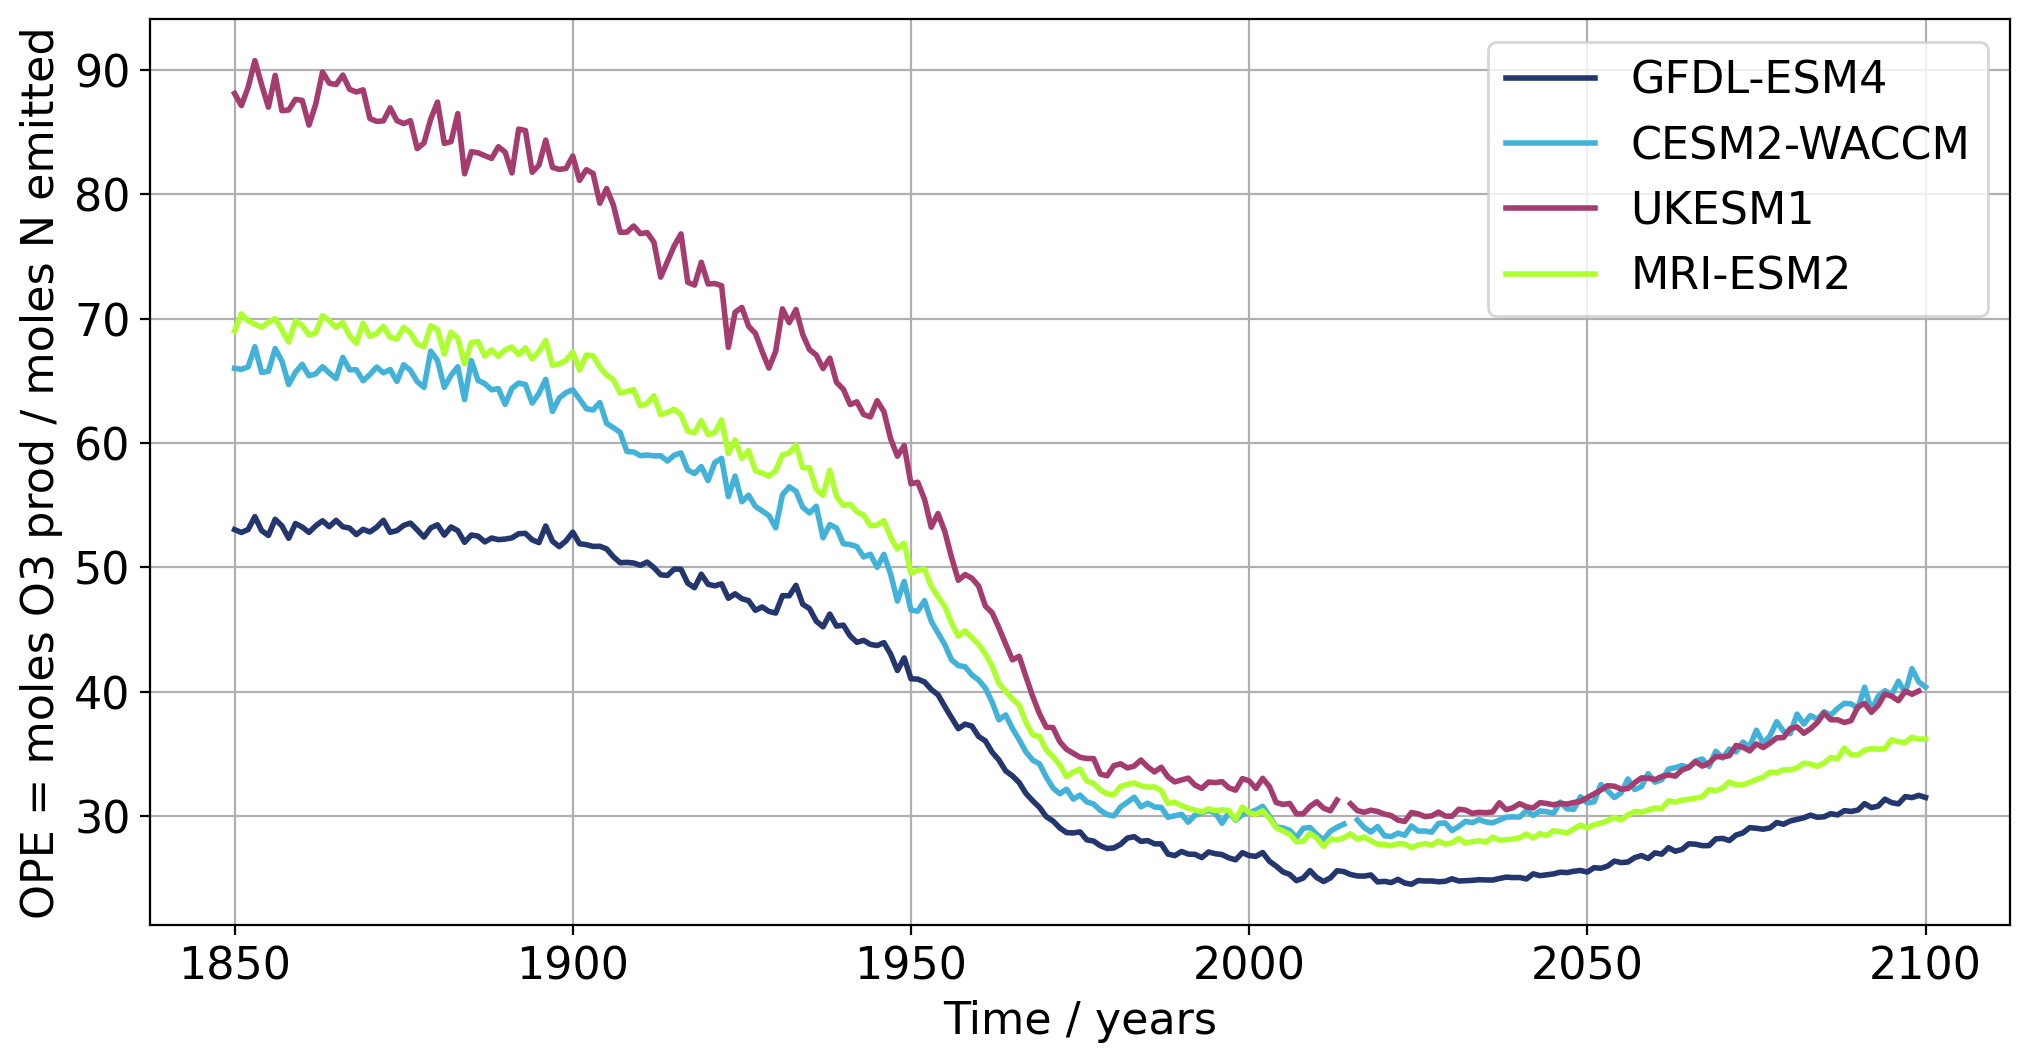

In [29]:
plt.figure()
#(giss_data['P (Tg/yr)']/48./((giss_data['ENOx (TgN/yr)']-giss_data['Lightning NOx (TgN/yr)'])/14.)).plot(color='r', label='GISS-E2-G') #giss_data['Anthropogenic NOx (TgN/yr)'], giss_data['Lightning NOx (TgN/yr)'], 
(gfdl_esm4_bud['O3_Prod']/48./((cmip6_ems['eminox_GFDL-ESM4_r1i1p1f1'])/14.)).plot(label='GFDL-ESM4',color='#23366D' )
(cesm2_waccm_bud['O3_Prod']/48./(cmip6_ems['eminox_CESM2-WACCM_r1i1p1f1']/14.)).plot(label='CESM2-WACCM', color='#43B2D8')
(ann_mean_budgt_data['TOT_P']/1e12/48/(cmip6_ems['eminox_UKESM1-0-LL_r1i1p1f2']/14.)).plot(label='UKESM1', color='#A43C70')
(mri_bud['O3_Prod']/48/(mri_eminox['r1i1p1f1']/14.)).plot(label='MRI-ESM2', color='#ADFF2F')
plt.legend()
plt.ylabel('OPE = moles O3 prod / moles N emitted')
plt.xlabel('Time / years')
plt.savefig('figures/REVISED_OPE_exclude_LNOx.pdf')

In [30]:
### OPE including LNOX

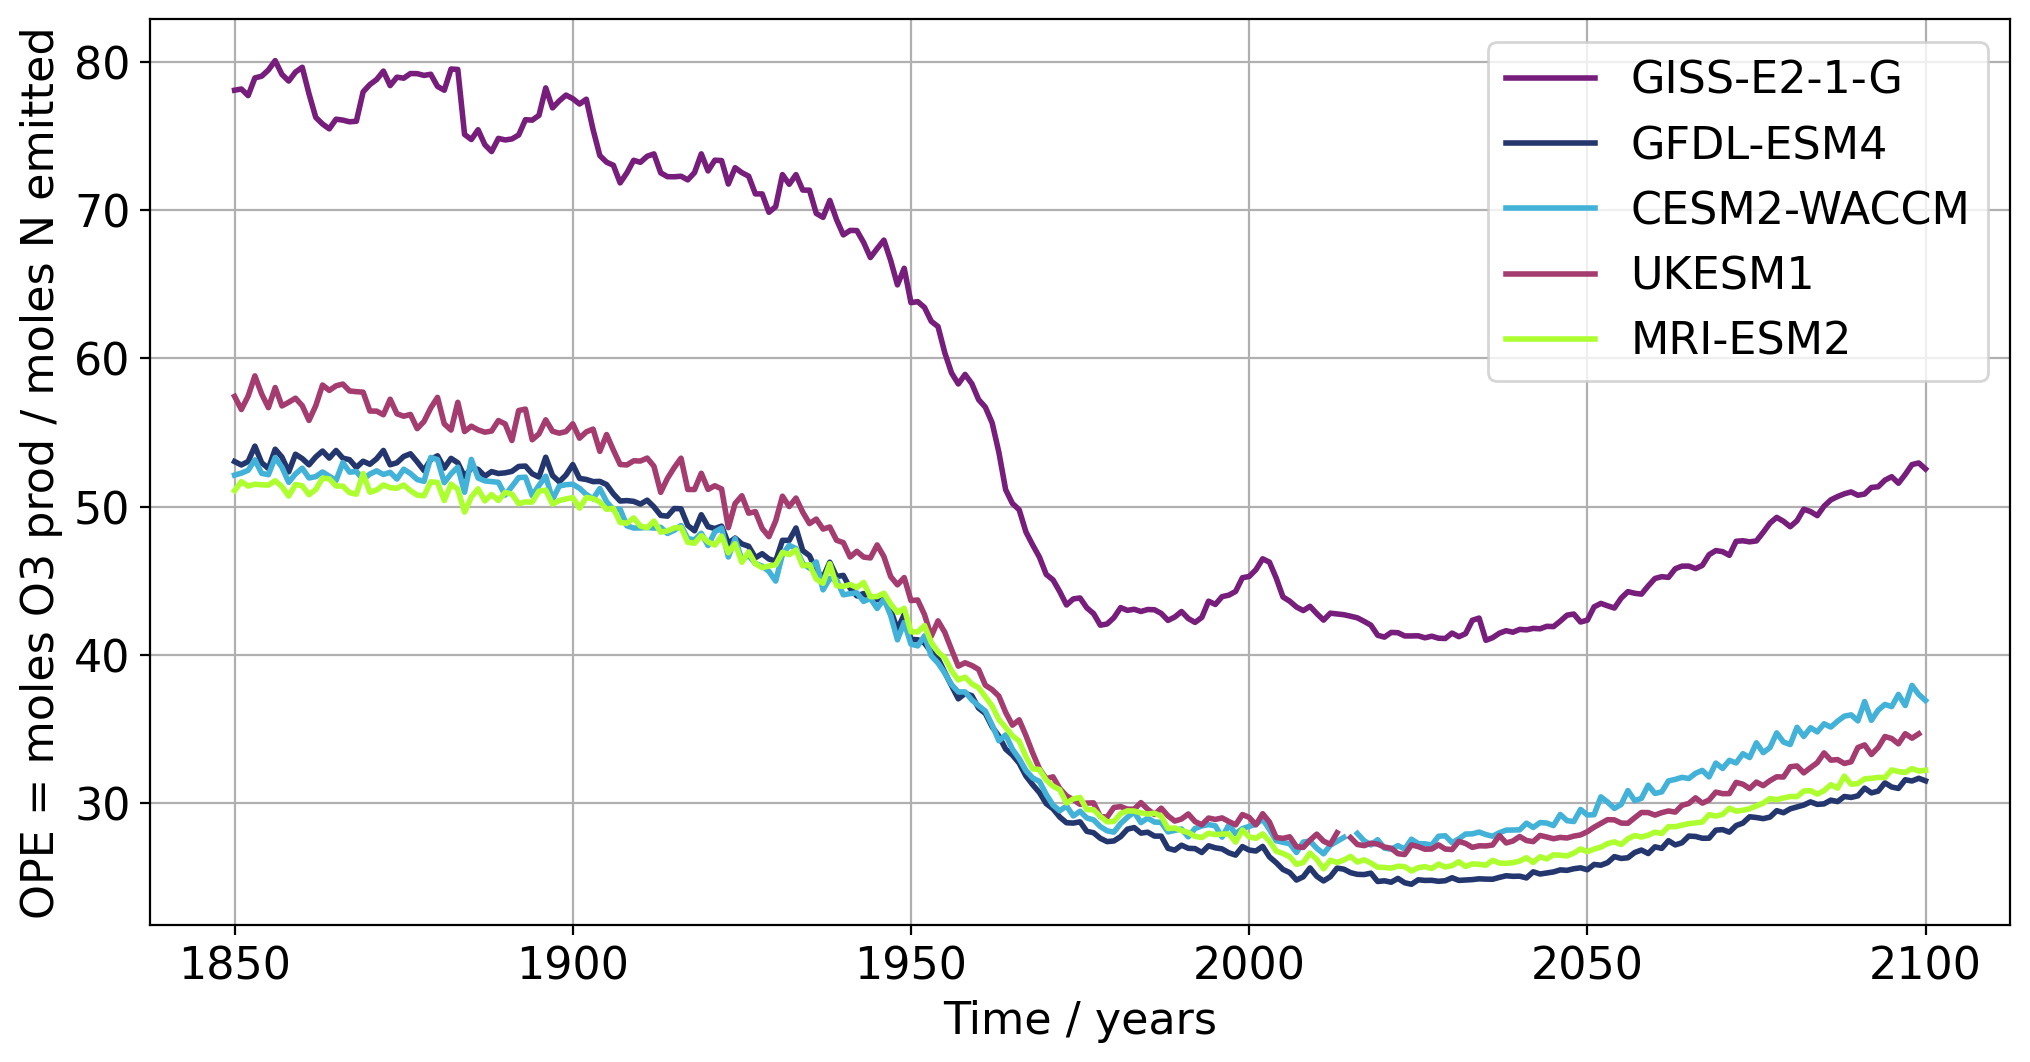

In [31]:
plt.figure()
(giss_data['P (Tg/yr)']/48./((giss_data['ENOx (TgN/yr)'])/14.)).plot(color='#771D7B', label='GISS-E2-1-G') #giss_data['Anthropogenic NOx (TgN/yr)'], giss_data['Lightning NOx (TgN/yr)'], 
(gfdl_esm4_bud['O3_Prod']/48./((cmip6_ems['eminox_GFDL-ESM4_r1i1p1f1'])/14.)).plot(label='GFDL-ESM4',color='#23366D' )
(cesm2_waccm_bud['O3_Prod']/48./((cmip6_ems['eminox_CESM2-WACCM_r1i1p1f1']+cesm2_waccm_emilnox['LNOx'])/14.)).plot(label='CESM2-WACCM', color='#43B2D8')
(ann_mean_budgt_data['TOT_P']/1e12/48/((cmip6_ems['eminox_UKESM1-0-LL_r1i1p1f2']+ukesm1_emilnox['LNOx'])/14.)).plot(label='UKESM1', color='#A43C70')
(mri_bud['O3_Prod']/48/((mri_eminox['r1i1p1f1']+mri_emilnox['LNOx'])/14.)).plot(label='MRI-ESM2', color='#ADFF2F')
plt.legend()
plt.ylabel('OPE = moles O3 prod / moles N emitted')
plt.xlabel('Time / years')
plt.savefig('figures/REVISED_OPE.pdf')